### Importing Packages and Load Data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [35]:
data = pd.read_csv("./train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [7]:
data.sample(5)

,FireplaceQu,GarageQual,SalePrice
103,NaN,TA,198900
847,Fa,TA,133500
338,NaN,TA,202500
1111,Gd,TA,205000
224,Ex,TA,386250


### Frequent Imputation (With Pandas)

In [9]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

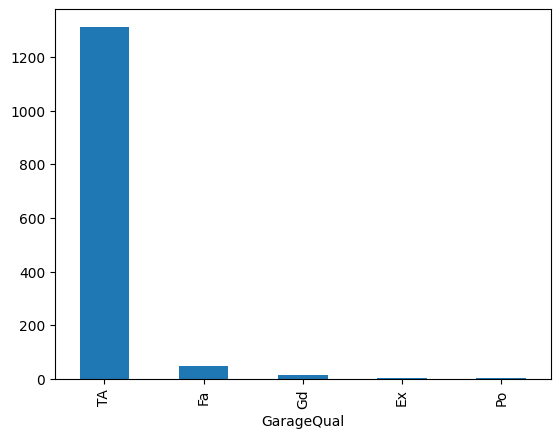

In [11]:
data['GarageQual'].value_counts().plot(kind='bar')

In [12]:
data['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

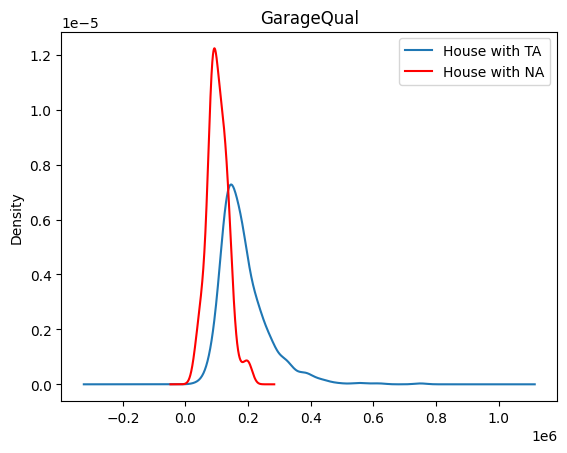

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

data[data['GarageQual'] =='TA']['SalePrice'].plot(kind='kde', ax=ax)
data[data['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['House with TA', 'House with NA']
ax.legend(lines, labels, loc='best')
plt.title('GarageQual')

In [19]:
temp = data[data['GarageQual'] == 'TA']['SalePrice']

In [20]:
data['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

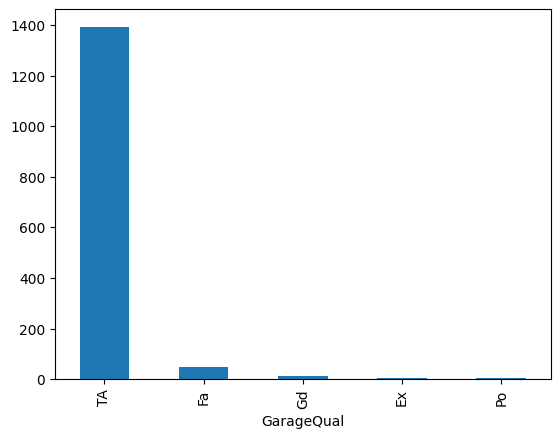

In [21]:
data['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

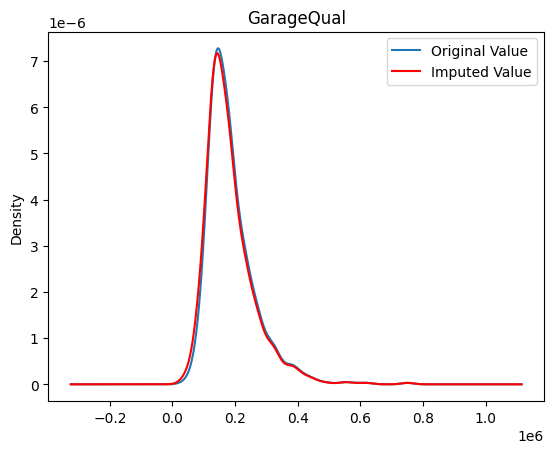

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)
data[data['GarageQual'] =='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Value', 'Imputed Value']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

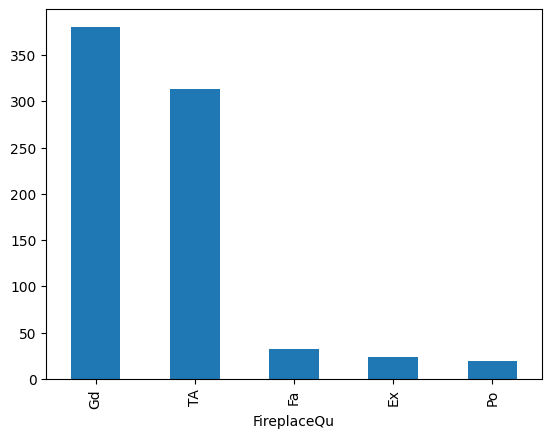

In [23]:
data['FireplaceQu'].value_counts().plot(kind='bar')

In [24]:
data['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

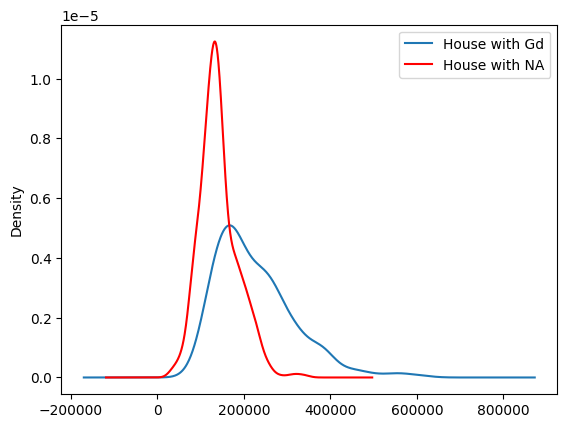

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

data[data['FireplaceQu'] =='Gd']['SalePrice'].plot(kind='kde', ax=ax)
data[data['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['House with Gd', 'House with NA']
ax.legend(lines, labels, loc='best')

In [26]:
temp = data[data['FireplaceQu'] == 'Gd']['SalePrice']

In [27]:
data['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

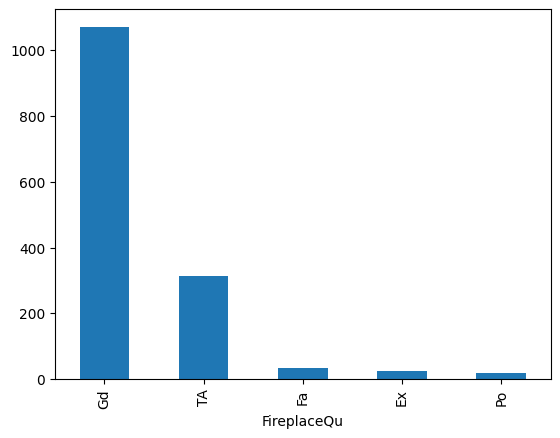

In [28]:
data['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

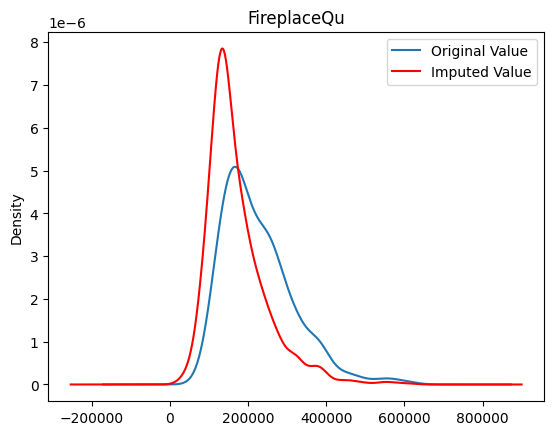

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

data[data['FireplaceQu'] =='Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Value', 'Imputed Value']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

### Frequent Imputation (Using SkLearn)

In [31]:
X_train, X_test,y_train,y_test = train_test_split(data.drop(columns=['SalePrice']),data['SalePrice'],test_size=0.2)

In [33]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [34]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

### Missing Category Imputation (Using Pandas)

Text(0, 0.5, 'Number of houses')

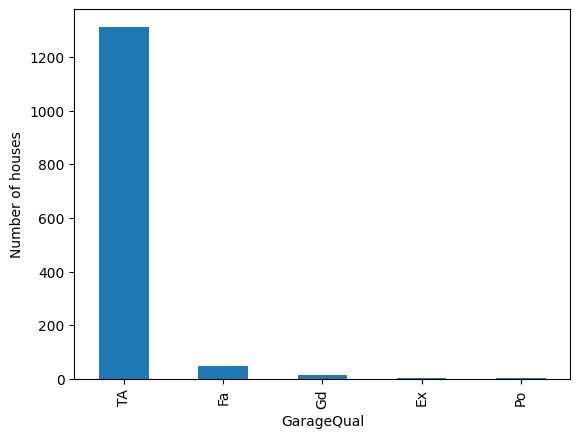

In [36]:
data['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")

In [37]:
data['GarageQual'].fillna("Missing",inplace=True)

Text(0, 0.5, 'Number of houses')

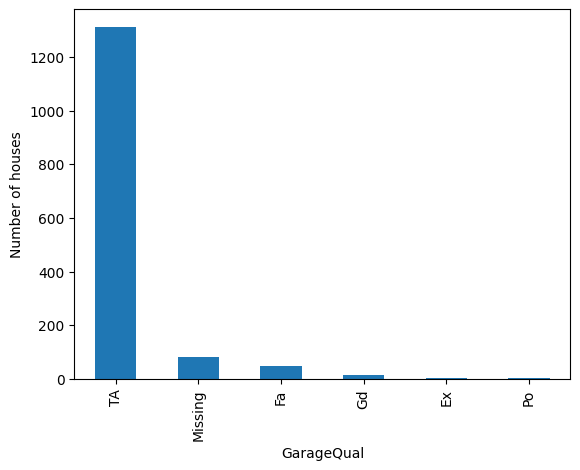

In [43]:
data['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")

### Missing Category Imputation (Using SkLearn)

In [44]:
X_train, X_test,y_train,y_test = train_test_split(data.drop(columns=['SalePrice']),data['SalePrice'],test_size=0.2)

In [45]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [46]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [47]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)